In [4]:
# Import necessary libraries
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Login to wandb (if not already logged in)
wandb.login()

# Define the project and entity
project_name = "Negatives_final"
entity_name = "ntourne"

# Initialize the wandb API
api = wandb.Api()

# Fetch all runs from the project
runs = api.runs(f"{entity_name}/{project_name}")

In [5]:
# Initialize a list to store results
results = []

# Iterate through runs and extract metrics
for run in runs:
    # Get the summary metrics, config, and name of the run
    summary = run.summary._json_dict
    config = run.config
    name = run.name
    
    # Combine the data into a single dictionary
    run_data = {
        "run_name": name,
        "TF": config.get("TF"),
        "celltype": config.get("celltype"),
        "neg_mode": config.get("neg_mode"),
        "cross_val_set": config.get("cross_val_set"),
        "group_name": config.get("group_name"),
        "AUROC": summary.get("test_AUROC"),
        "AUROC_HQ": summary.get("test_AUROC_HQ"),
        "val_loss": summary.get("val_loss"),
        "pos_limit": config.get("pos_limit"),
    }
    results.append(run_data)

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

In [6]:
results_df = pd.DataFrame(results)
results_df = results_df[results_df['group_name'].isin(["num_pos_run_1", "num_pos_run_1_HQ_REDO", "num_pos_run_1_REDO"])] # select the right groups
# HQ_results = pd.DataFrame(results)
# HQ_results = HQ_results[HQ_results['group_name'] == "full_run_3_HQ"]
# HQ_results["neg_mode"] = "HQ training"
# HQ_results = HQ_results.rename(columns={"AUROC": "AUROC_HQ", "AUROC_HQ": "AUROC"})
# HQ_results = HQ_results[HQ_results['celltype'].isin(['A549', 'GM12878', 'K562', 'HepG2'])] # only the right celltypes
# # Merge results_df with HQ_results, aligning columns as needed
# results_df = pd.concat([results_df, HQ_results], ignore_index=True)

In [7]:
results_df

,run_name,TF,celltype,neg_mode,cross_val_set,group_name,AUROC,AUROC_HQ,val_loss,pos_limit
4320,HepG2_USF-1_CV3_20250801_12:23,USF-1,HepG2,dinucl_sampled,3,num_pos_run_1,0.781786,0.704377,0.763240,200.0
4321,HepG2_USF-1_CV0_20250801_12:23,USF-1,HepG2,dinucl_sampled,0,num_pos_run_1,0.740115,0.651371,0.714109,200.0
4322,HepG2_USF-1_CV2_20250801_12:23,USF-1,HepG2,dinucl_sampled,2,num_pos_run_1,0.837026,0.810775,0.533292,200.0
4323,HepG2_USF-1_CV1_20250801_12:23,USF-1,HepG2,dinucl_sampled,1,num_pos_run_1,0.889271,0.845120,0.680313,200.0
4324,HepG2_USF-1_CV4_20250801_12:51,USF-1,HepG2,dinucl_sampled,4,num_pos_run_1,0.885871,0.841616,0.783926,200.0
...,...,...,...,...,...,...,...,...,...,...
9006,HepG2_USF-1_CV3_20250821_16:04,USF-1,HepG2,dinucl_sampled,3,num_pos_run_1_REDO,0.957724,0.938402,0.722914,6000.0
9007,HepG2_USF-1_CV4_20250821_16:05,USF-1,HepG2,dinucl_sampled,4,num_pos_run_1_REDO,0.952594,0.929424,0.612229,5000.0
9008,HepG2_USF-1_CV4_20250821_16:07,USF-1,HepG2,dinucl_sampled,4,num_pos_run_1_REDO,0.963669,0.946388,0.604962,6000.0
9009,HepG2_USF-1_CV5_20250821_16:14,USF-1,HepG2,dinucl_sampled,5,num_pos_run_1_REDO,0.967088,0.958998,0.337898,5000.0


In [8]:
# Replace AUROC_HQ with AUROC values for rows with group_name "num_pos_run_1_HQ_REDO"
results_df.loc[results_df['group_name'] == 'num_pos_run_1_HQ_REDO', 'AUROC_HQ'] = results_df.loc[results_df['group_name'] == 'num_pos_run_1_HQ_REDO', 'AUROC']
results_df.loc[results_df['group_name'] == 'num_pos_run_1_HQ_REDO', 'neg_mode'] = 'HQ'

In [9]:
# Check the amount of entries for each combination of TF, celltype, and neg_mode
combination_counts = results_df.groupby(['TF', 'celltype', 'neg_mode']).size().reset_index(name='count')
print(f"Total combinations: {len(combination_counts)}")
print(f"Count distribution:")
print(combination_counts['count'].value_counts().sort_index())
print(combination_counts)

Total combinations: 58
Count distribution:
count
50     1
60     1
62     1
68     2
70     2
72     2
80     3
83     5
84    41
Name: count, dtype: int64
                   TF celltype         neg_mode  count
0                CTCF    HepG2               HQ     84
1                CTCF    HepG2         celltype     83
2                CTCF    HepG2   dinucl_sampled     84
3                CTCF    HepG2  dinucl_shuffled     84
4                CTCF    HepG2        neighbors     84
5                CTCF    HepG2         shuffled     84
6       ELF1_(SC-631)    HepG2               HQ     50
7       ELF1_(SC-631)    HepG2         celltype     80
8       ELF1_(SC-631)    HepG2   dinucl_sampled     70
9       ELF1_(SC-631)    HepG2  dinucl_shuffled     84
10      ELF1_(SC-631)    HepG2        neighbors     84
11      ELF1_(SC-631)    HepG2         shuffled     84
12              FOSL2    HepG2               HQ     62
13              FOSL2    HepG2         celltype     83
14              FOS

In [10]:
# Check the amount of entries for each combination of TF, celltype, neg_mode, and cross_val_set
combination_counts_cv = results_df.groupby(['TF', 'celltype', 'neg_mode', 'cross_val_set']).size().reset_index(name='count')
print(f"Total combinations with CV: {len(combination_counts_cv)}")
print(f"Count distribution:")
print(combination_counts_cv['count'].value_counts().sort_index())
print(combination_counts_cv)

Total combinations with CV: 348
Count distribution:
count
8       4
9       2
10     16
11     20
13     23
14    283
Name: count, dtype: int64
        TF celltype  neg_mode  cross_val_set  count
0     CTCF    HepG2        HQ              0     14
1     CTCF    HepG2        HQ              1     14
2     CTCF    HepG2        HQ              2     14
3     CTCF    HepG2        HQ              3     14
4     CTCF    HepG2        HQ              4     14
..     ...      ...       ...            ...    ...
343  USF-1    HepG2  shuffled              1     14
344  USF-1    HepG2  shuffled              2     14
345  USF-1    HepG2  shuffled              3     14
346  USF-1    HepG2  shuffled              4     14
347  USF-1    HepG2  shuffled              5     14

[348 rows x 5 columns]


In [11]:
# Display the complete results_df without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print(combination_counts_cv)

                    TF celltype         neg_mode  cross_val_set  count
0                 CTCF    HepG2               HQ              0     14
1                 CTCF    HepG2               HQ              1     14
2                 CTCF    HepG2               HQ              2     14
3                 CTCF    HepG2               HQ              3     14
4                 CTCF    HepG2               HQ              4     14
5                 CTCF    HepG2               HQ              5     14
6                 CTCF    HepG2         celltype              0     13
7                 CTCF    HepG2         celltype              1     14
8                 CTCF    HepG2         celltype              2     14
9                 CTCF    HepG2         celltype              3     14
10                CTCF    HepG2         celltype              4     14
11                CTCF    HepG2         celltype              5     14
12                CTCF    HepG2   dinucl_sampled              0     14
13    

In [12]:
tf_min_positives = [
    ('MafK_(ab50322)', 14790),
    ('CTCF', 14192),
    ('FOXA1_(SC-101058)', 11540),
    ('MafF_(M8194)', 9054),
    ('JunD', 7888),
    ('SP1', 7249),
    ('FOSL2', 6745),
    ('USF-1', 6098),
    ('Mxi1_(AF4185)', 5564),
    ('ELF1_(SC-631)', 4968)
]

In [13]:
# Create a dictionary for quick lookup of minimum positives per TF
tf_min_dict = dict(tf_min_positives)

# Filter out rows where pos_limit exceeds the minimum positives for that TF
results_df_filtered = results_df[
    results_df.apply(lambda row: row['pos_limit'] <= tf_min_dict.get(row['TF'], float('inf')), axis=1)
]

print(f"Original data shape: {results_df.shape}")
print(f"Filtered data shape: {results_df_filtered.shape}")
print(f"Rows removed: {results_df.shape[0] - results_df_filtered.shape[0]}")

# Update results_df to the filtered version
results_df = results_df_filtered

Original data shape: (4691, 10)
Filtered data shape: (3981, 10)
Rows removed: 710


In [14]:
# Check the amount of entries for each combination of TF, celltype, neg_mode, and cross_val_set
combination_counts_cv = results_df.groupby(['TF', 'celltype', 'neg_mode', 'cross_val_set']).size().reset_index(name='count')
print(f"Total combinations with CV: {len(combination_counts_cv)}")
print(f"Count distribution:")
print(combination_counts_cv['count'].value_counts().sort_index())
print(combination_counts_cv)

Total combinations with CV: 348
Count distribution:
count
8      36
9      31
10     72
11     65
13     37
14    107
Name: count, dtype: int64
                    TF celltype         neg_mode  cross_val_set  count
0                 CTCF    HepG2               HQ              0     14
1                 CTCF    HepG2               HQ              1     14
2                 CTCF    HepG2               HQ              2     14
3                 CTCF    HepG2               HQ              3     14
4                 CTCF    HepG2               HQ              4     14
5                 CTCF    HepG2               HQ              5     14
6                 CTCF    HepG2         celltype              0     13
7                 CTCF    HepG2         celltype              1     14
8                 CTCF    HepG2         celltype              2     14
9                 CTCF    HepG2         celltype              3     14
10                CTCF    HepG2         celltype              4     14
11  

In [15]:
 #! OKAY SO THERE ARE SOME MISSING!

In [16]:
# Add expected column with the maximum count value within each TF
combination_counts_cv['expected'] = combination_counts_cv.groupby('TF')['count'].transform('max')

In [17]:
print(combination_counts_cv)

                    TF celltype         neg_mode  cross_val_set  count  \
0                 CTCF    HepG2               HQ              0     14   
1                 CTCF    HepG2               HQ              1     14   
2                 CTCF    HepG2               HQ              2     14   
3                 CTCF    HepG2               HQ              3     14   
4                 CTCF    HepG2               HQ              4     14   
5                 CTCF    HepG2               HQ              5     14   
6                 CTCF    HepG2         celltype              0     13   
7                 CTCF    HepG2         celltype              1     14   
8                 CTCF    HepG2         celltype              2     14   
9                 CTCF    HepG2         celltype              3     14   
10                CTCF    HepG2         celltype              4     14   
11                CTCF    HepG2         celltype              5     14   
12                CTCF    HepG2   dinu

In [18]:
# Find missing combinations by comparing with expected counts
missing_runs = []

# Get all unique combinations that should exist
for tf in combination_counts_cv['TF'].unique():
    max_count = combination_counts_cv[combination_counts_cv['TF'] == tf]['count'].max()
    
    # Get all existing combinations for this TF
    tf_combinations = combination_counts_cv[combination_counts_cv['TF'] == tf]
    
    # Find combinations with count less than max (missing runs)
    incomplete_combinations = tf_combinations[tf_combinations['count'] < max_count]
    
    for _, row in incomplete_combinations.iterrows():
        tf_name = row['TF']
        celltype = row['celltype'] 
        neg_mode = row['neg_mode']
        cross_val_set = row['cross_val_set']
        current_count = row['count']
        expected_count = max_count
        missing_count = expected_count - current_count
        
        # Get pos_limit values for this TF from original results_df
        pos_limits = results_df[results_df['TF'] == tf_name]['pos_limit'].unique()
        
        # For each missing run, we need to determine which pos_limit values are missing
        existing_pos_limits = results_df[
            (results_df['TF'] == tf_name) & 
            (results_df['celltype'] == celltype) & 
            (results_df['neg_mode'] == neg_mode) & 
            (results_df['cross_val_set'] == cross_val_set)
        ]['pos_limit'].unique()
        
        missing_pos_limits = set(pos_limits) - set(existing_pos_limits)
        
        # Add missing runs to the list
        for pos_limit in missing_pos_limits:
            missing_runs.append({
                'TF': tf_name,
                'celltype': celltype,
                'neg_mode': neg_mode,
                'cross_val_set': cross_val_set,
                'pos_limit': pos_limit
            })

# Create DataFrame from missing runs
missing_runs_df = pd.DataFrame(missing_runs)
print(f"Total missing runs: {len(missing_runs_df)}")
missing_runs_df

Total missing runs: 3


,TF,celltype,neg_mode,cross_val_set,pos_limit
0,CTCF,HepG2,celltype,0,2000.0
1,FOSL2,HepG2,celltype,2,1500.0
2,JunD,HepG2,celltype,2,1500.0


In [19]:
missing_runs_df.to_csv('/data/home/natant/Negatives/Runs/num_pos_run_1/missing_runs.csv', index=False)
print(f"Missing runs saved to 'missing_runs.csv' with {len(missing_runs_df)} entries")

Missing runs saved to 'missing_runs.csv' with 3 entries


In [20]:
# Average the scores per TF-celltype-neg_mode combination over different cross_val_sets
averaged_results = results_df.groupby(['TF', 'celltype', 'neg_mode', 'pos_limit']).agg({
    'AUROC': 'mean',
    'AUROC_HQ': 'mean',
    'val_loss': 'mean'
}).reset_index()

# Display the averaged results
print(f"Original data shape: {results_df.shape}")
print(f"Averaged data shape: {averaged_results.shape}")
averaged_results.head()

Original data shape: (3981, 10)
Averaged data shape: (664, 7)


,TF,celltype,neg_mode,pos_limit,AUROC,AUROC_HQ,val_loss
0,CTCF,HepG2,HQ,200.0,0.747100,0.747100,0.958399
1,CTCF,HepG2,HQ,300.0,0.713144,0.713144,0.761991
2,CTCF,HepG2,HQ,500.0,0.831475,0.831475,0.737344
3,CTCF,HepG2,HQ,1000.0,0.873525,0.873525,0.876977
4,CTCF,HepG2,HQ,1500.0,0.904924,0.904924,0.560325


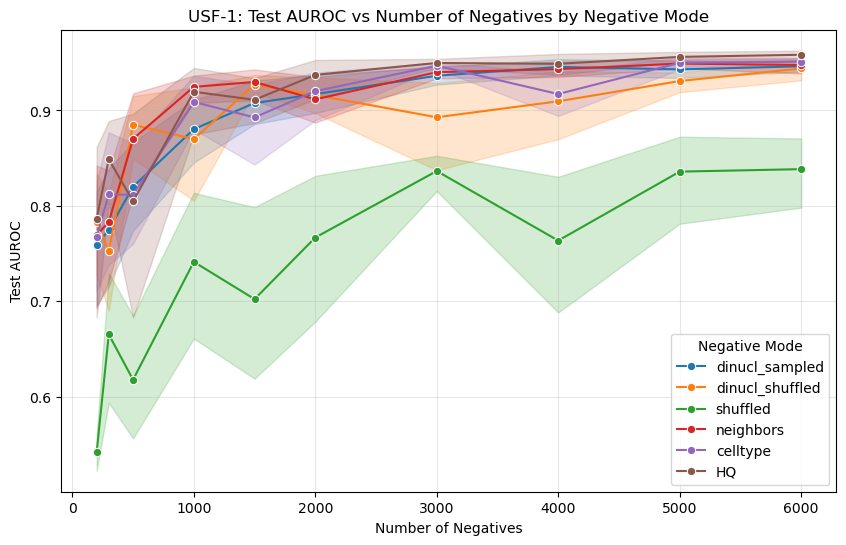

In [21]:
# Filter data for USF-1
usf1_data = results_df[results_df['TF'] == 'USF-1'].copy()

# Calculate the number of negatives for each cross-validation set
# Based on the combination_counts_cv, we can see the count for each CV set
usf1_with_negatives = usf1_data.merge(
    combination_counts_cv[combination_counts_cv['TF'] == 'USF-1'][['neg_mode', 'cross_val_set', 'count']],
    on=['neg_mode', 'cross_val_set'],
    how='left'
)

# Create the lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=usf1_with_negatives, x='pos_limit', y='AUROC_HQ', hue='neg_mode', marker='o')
plt.xlabel('Number of Negatives')
plt.ylabel('Test AUROC')
plt.title('USF-1: Test AUROC vs Number of Negatives by Negative Mode')
plt.legend(title='Negative Mode')
plt.grid(True, alpha=0.3)
plt.show()

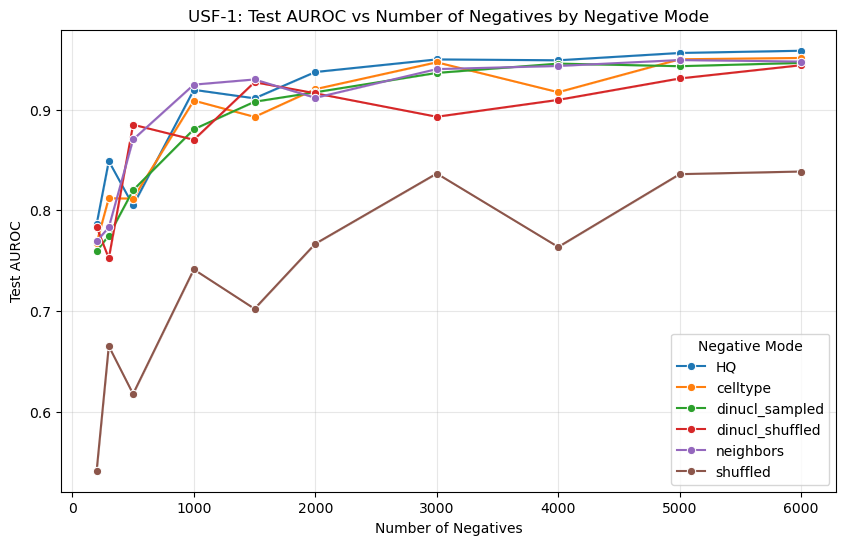

In [22]:
# Filter data for USF-1
usf1_data = averaged_results[averaged_results['TF'] == 'USF-1'].copy()

# Calculate the number of negatives for each cross-validation set
# Based on the combination_counts_cv, we can see the count for each CV set
usf1_with_negatives = usf1_data.merge(
    combination_counts_cv[combination_counts_cv['TF'] == 'USF-1'][['neg_mode', 'count']],
    on=['neg_mode'],
    how='left'
)

# Create the lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=usf1_with_negatives, x='pos_limit', y='AUROC_HQ', hue='neg_mode', marker='o')
plt.xlabel('Number of Negatives')
plt.ylabel('Test AUROC')
plt.title('USF-1: Test AUROC vs Number of Negatives by Negative Mode')
plt.legend(title='Negative Mode')
plt.grid(True, alpha=0.3)
plt.show()

Unique TFs: ['USF-1' 'SP1' 'FOXA1_(SC-101058)' 'CTCF' 'MafK_(ab50322)' 'MafF_(M8194)'
 'FOSL2' 'JunD' 'ELF1_(SC-631)' 'Mxi1_(AF4185)']
TFs to plot (after filtering): ['USF-1', 'FOXA1_(SC-101058)', 'CTCF', 'MafK_(ab50322)', 'MafF_(M8194)', 'FOSL2', 'JunD', 'ELF1_(SC-631)']


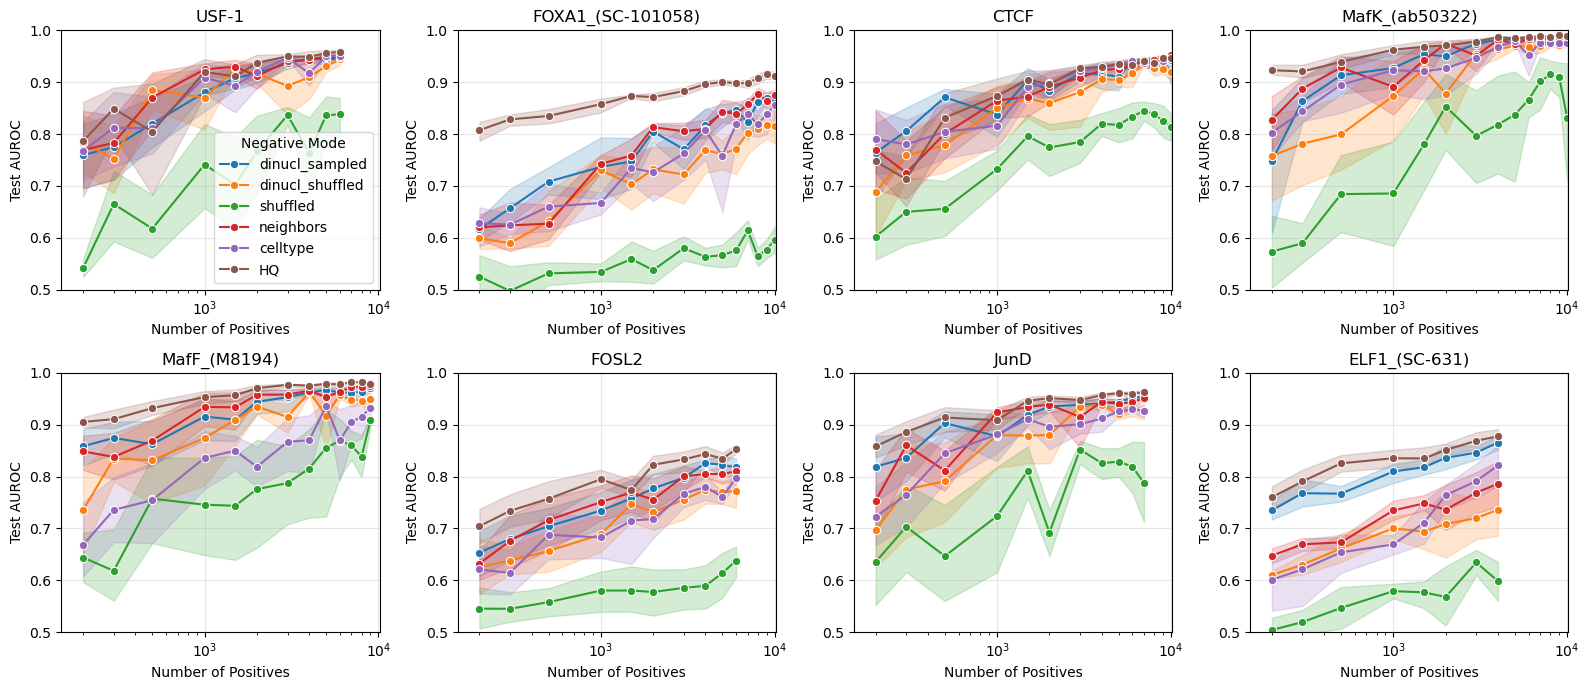

In [23]:
# Get unique TFs
unique_tfs = results_df['TF'].unique()
print(f"Unique TFs: {unique_tfs}")

# Filter out SP1 and Mxi1_(AF4185) from the TFs to plot
unique_tfs = [tf for tf in unique_tfs if tf not in ['SP1', 'Mxi1_(AF4185)']]
print(f"TFs to plot (after filtering): {unique_tfs}")

# Create subplots
n_tfs = len(unique_tfs)
n_cols = 4  # Number of columns in subplot grid
n_rows = (n_tfs + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 3.5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

# Create a plot for each TF
for i, tf in enumerate(unique_tfs):
    # Filter data for current TF
    tf_data = results_df[results_df['TF'] == tf].copy()
    
    # Merge with combination counts to get number of negatives
    tf_with_negatives = tf_data.merge(
        combination_counts_cv[combination_counts_cv['TF'] == tf][['neg_mode', 'cross_val_set', 'count']],
        on=['neg_mode', 'cross_val_set'],
        how='left'
    )
    
    # Create the lineplot
    sns.lineplot(data=tf_with_negatives, x='pos_limit', y='AUROC_HQ', hue='neg_mode', 
                marker='o', ax=axes[i])
    axes[i].set_xlabel('Number of Positives')
    axes[i].set_ylim(0.5, 1.0)  # Set y-axis limits for better visibility
    axes[i].set_xlim(150, 10150)
    axes[i].set_ylabel('Test AUROC')
    axes[i].set_title(f'{tf}')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xscale('log')  # Set x-axis to logarithmic scale for better visibility of differences
    
    # Adjust legend
    if i == 0:
        axes[i].legend(title='Negative Mode', loc='lower right')
    else:
        axes[i].legend().set_visible(False)

# Hide any unused subplots
for i in range(n_tfs, len(axes)):
    axes[i].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.savefig('num_pos.pdf', bbox_inches='tight', dpi=300)
plt.show()

Unique TFs: ['USF-1' 'SP1' 'FOXA1_(SC-101058)' 'CTCF' 'MafK_(ab50322)' 'MafF_(M8194)'
 'FOSL2' 'JunD' 'ELF1_(SC-631)' 'Mxi1_(AF4185)']
TFs to plot (after filtering): ['USF-1', 'FOXA1_(SC-101058)', 'CTCF', 'MafK_(ab50322)', 'MafF_(M8194)', 'FOSL2', 'JunD', 'ELF1_(SC-631)']


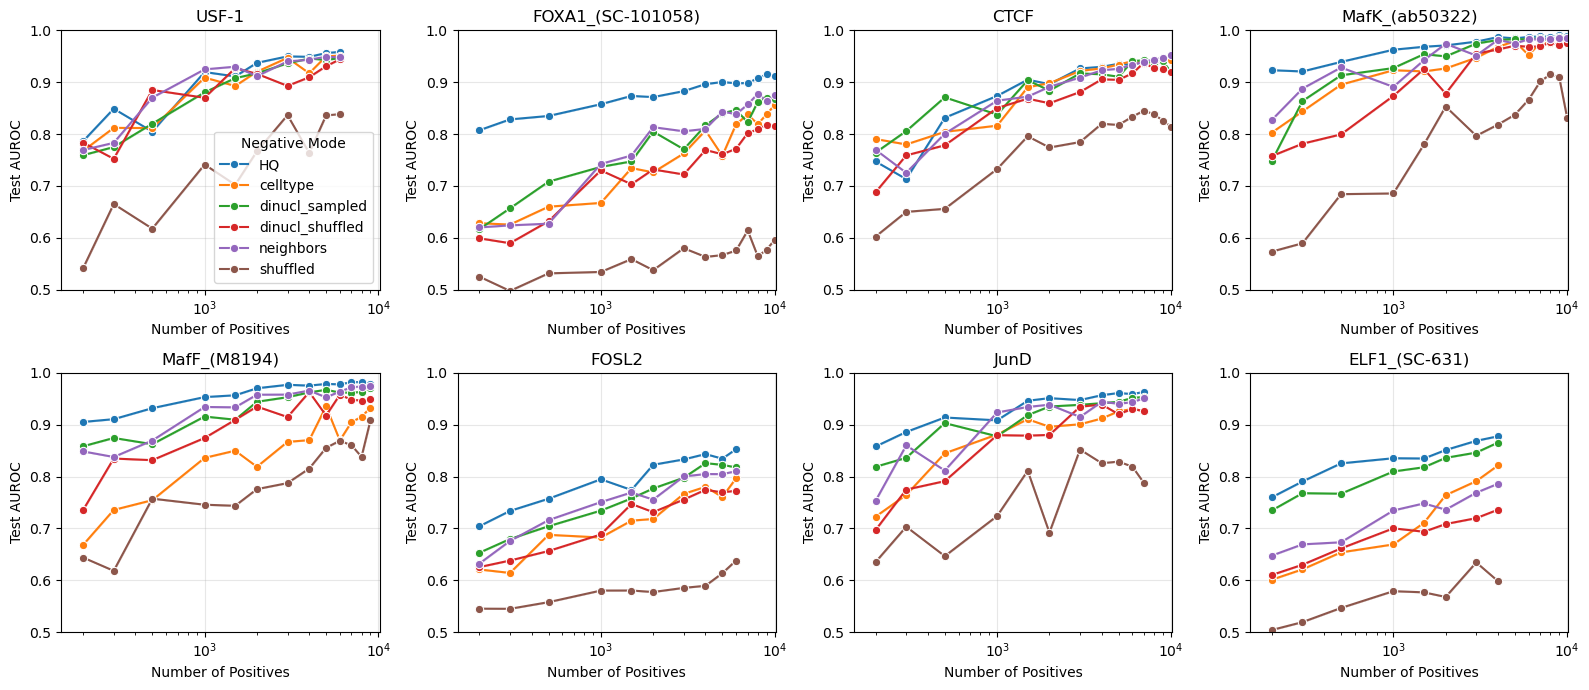

In [24]:
# Get unique TFs
unique_tfs = results_df['TF'].unique()
print(f"Unique TFs: {unique_tfs}")

# Filter out SP1 and Mxi1_(AF4185) from the TFs to plot
unique_tfs = [tf for tf in unique_tfs if tf not in ['SP1', 'Mxi1_(AF4185)']]
print(f"TFs to plot (after filtering): {unique_tfs}")

# Create subplots
n_tfs = len(unique_tfs)
n_cols = 4  # Number of columns in subplot grid
n_rows = (n_tfs + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 3.5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

# Create a plot for each TF
for i, tf in enumerate(unique_tfs):
    # Filter data for current TF
    tf_data = averaged_results[averaged_results['TF'] == tf].copy()
    
    # Merge with combination counts to get number of negatives
    tf_with_negatives = tf_data.merge(
        combination_counts_cv[combination_counts_cv['TF'] == tf][['neg_mode', 'count']],
        on=['neg_mode'],
        how='left'
    )
    
    # Create the lineplot
    sns.lineplot(data=tf_with_negatives, x='pos_limit', y='AUROC_HQ', hue='neg_mode', 
                marker='o', ax=axes[i])
    axes[i].set_xlabel('Number of Positives')
    axes[i].set_ylim(0.5, 1.0)  # Set y-axis limits for better visibility
    axes[i].set_xlim(150, 10150)
    axes[i].set_ylabel('Test AUROC')
    axes[i].set_title(f'{tf}')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xscale('log')  # Set x-axis to logarithmic scale for better visibility of differences
    
    # Adjust legend
    if i == 0:
        axes[i].legend(title='Negative Mode', loc='lower right')
    else:
        axes[i].legend().set_visible(False)

# Hide any unused subplots
for i in range(n_tfs, len(axes)):
    axes[i].set_visible(False)

# Adjust layout
plt.tight_layout()
#plt.savefig('num_pos.pdf', bbox_inches='tight', dpi=300)
plt.show()

Unique TFs: ['USF-1' 'SP1' 'FOXA1_(SC-101058)' 'CTCF' 'MafK_(ab50322)' 'MafF_(M8194)'
 'FOSL2' 'JunD' 'ELF1_(SC-631)' 'Mxi1_(AF4185)']
TFs to plot (after filtering): ['USF-1', 'FOXA1_(SC-101058)', 'CTCF', 'MafK_(ab50322)', 'MafF_(M8194)', 'FOSL2', 'JunD', 'ELF1_(SC-631)']


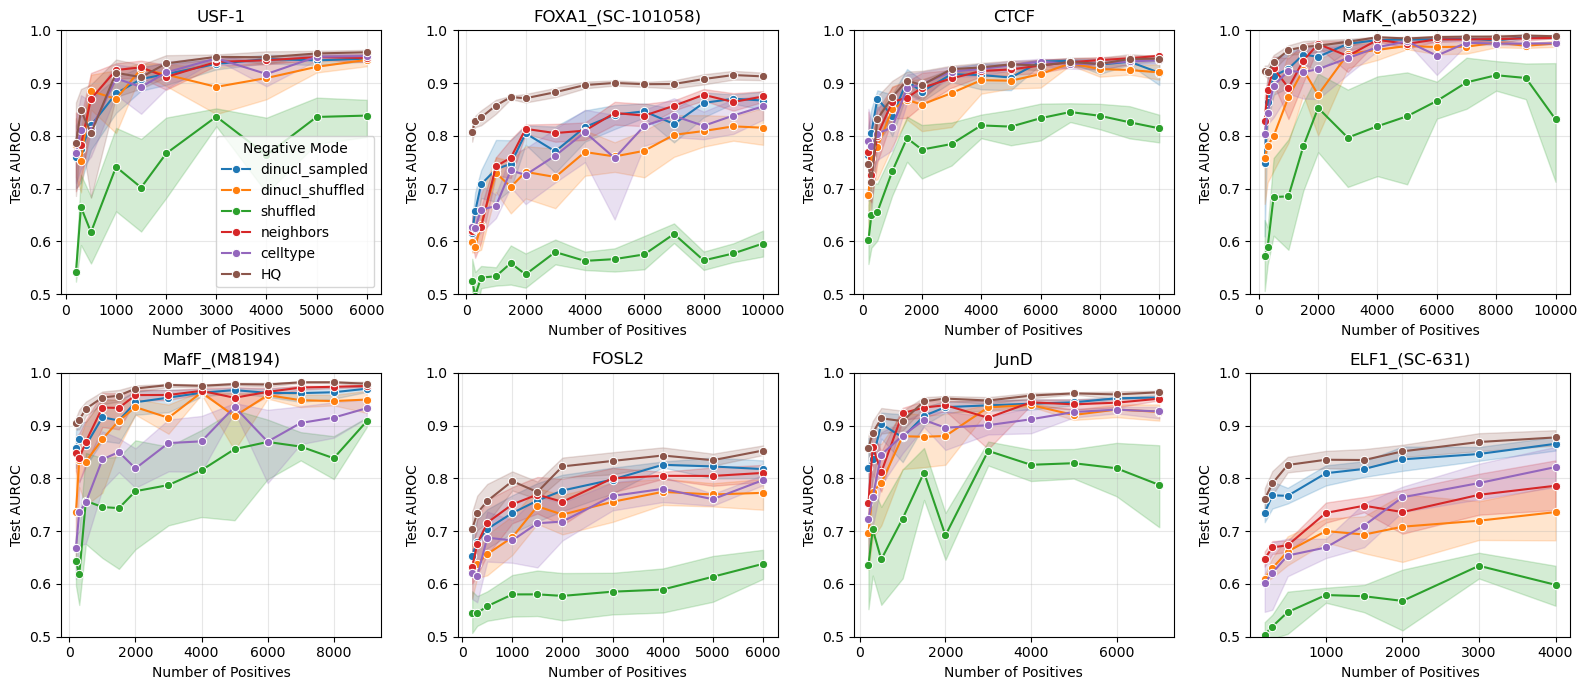

In [25]:
# Get unique TFs
unique_tfs = results_df['TF'].unique()
print(f"Unique TFs: {unique_tfs}")

# Filter out SP1 and Mxi1_(AF4185) from the TFs to plot
unique_tfs = [tf for tf in unique_tfs if tf not in ['SP1', 'Mxi1_(AF4185)']]
print(f"TFs to plot (after filtering): {unique_tfs}")

# Create subplots
n_tfs = len(unique_tfs)
n_cols = 4  # Number of columns in subplot grid
n_rows = (n_tfs + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 3.5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

# Create a plot for each TF
for i, tf in enumerate(unique_tfs):
    # Filter data for current TF
    tf_data = results_df[results_df['TF'] == tf].copy()
    
    # Merge with combination counts to get number of negatives
    tf_with_negatives = tf_data.merge(
        combination_counts_cv[combination_counts_cv['TF'] == tf][['neg_mode', 'cross_val_set', 'count']],
        on=['neg_mode', 'cross_val_set'],
        how='left'
    )
    
    # Create the lineplot
    sns.lineplot(data=tf_with_negatives, x='pos_limit', y='AUROC_HQ', hue='neg_mode', 
                marker='o', ax=axes[i])
    axes[i].set_xlabel('Number of Positives')
    axes[i].set_ylim(0.5, 1.0)  # Set y-axis limits for better visibility
    axes[i].set_ylabel('Test AUROC')
    axes[i].set_title(f'{tf}')
    axes[i].grid(True, alpha=0.3)
    #axes[i].set_xscale('log')  # Set x-axis to logarithmic scale for better visibility of differences
    
    # Adjust legend
    if i == 0:
        axes[i].legend(title='Negative Mode', loc='lower right')
    else:
        axes[i].legend().set_visible(False)

# Hide any unused subplots
for i in range(n_tfs, len(axes)):
    axes[i].set_visible(False)

# Adjust layout
plt.tight_layout()
#plt.savefig('num_pos.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [26]:
import os

# Define the folder path
folder_path = "/data/home/natant/Negatives/Runs/full_run_1/motifs"

# Get a list of all CSV files in the folder, excluding HEK293 and MCF-7
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv') and f not in ['HEK293.csv', 'MCF-7.csv']]

# Load each CSV file into a dictionary of DataFrames
dataframes = {os.path.splitext(f)[0]: pd.read_csv(os.path.join(folder_path, f)) for f in csv_files}
dataframes = {name: df.rename(columns={"Unnamed: 0": "TF"}) for name, df in dataframes.items()}

# Print the names of the loaded DataFrames
print(f"Loaded DataFrames: {list(dataframes.keys())}")

Loaded DataFrames: ['A549', 'GM12878', 'K562', 'HepG2']


In [27]:
# Initialize an empty list to store DataFrames
merged_dfs = []

# Iterate through the CSV files and process each one
for celltype in csv_files:
    # Extract the cell type name (without the .csv extension)
    celltype_name = os.path.splitext(celltype)[0]
    
    # Load the DataFrame for the current cell type
    df = dataframes[celltype_name]
    
    # Average AUROC_1, AUROC_2, AUROC_3 into a new column "AUROC"
    df["AUROC"] = df[["AUROC_1", "AUROC_2", "AUROC_3"]].mean(axis=1)
    
    # Keep only the relevant columns
    df = df[["TF", "AUROC"]].copy()
    
    # Add additional columns for cell type and neg_mode
    df['celltype'] = celltype_name
    df['neg_mode'] = 'motif'
    
    # Append the processed DataFrame to the list
    merged_dfs.append(df)

# Concatenate all the DataFrames into a single DataFrame
motif_df = pd.concat(merged_dfs, ignore_index=True)


In [28]:
motif_performance = motif_df[(motif_df["celltype"] == "HepG2") & (motif_df["TF"].isin(['USF-1', 'SP1', 'FOXA1_(SC-101058)', 'CTCF', 'MafK_(ab50322)', 'MafF_(M8194)','FOSL2', 'JunD', 'ELF1_(SC-631)', 'Mxi1_(AF4185)']))]

Unique TFs: ['USF-1' 'SP1' 'FOXA1_(SC-101058)' 'CTCF' 'MafK_(ab50322)' 'MafF_(M8194)'
 'FOSL2' 'JunD' 'ELF1_(SC-631)' 'Mxi1_(AF4185)']
TFs to plot (after filtering): ['USF-1', 'FOXA1_(SC-101058)', 'CTCF', 'MafK_(ab50322)', 'MafF_(M8194)', 'FOSL2', 'JunD', 'ELF1_(SC-631)']


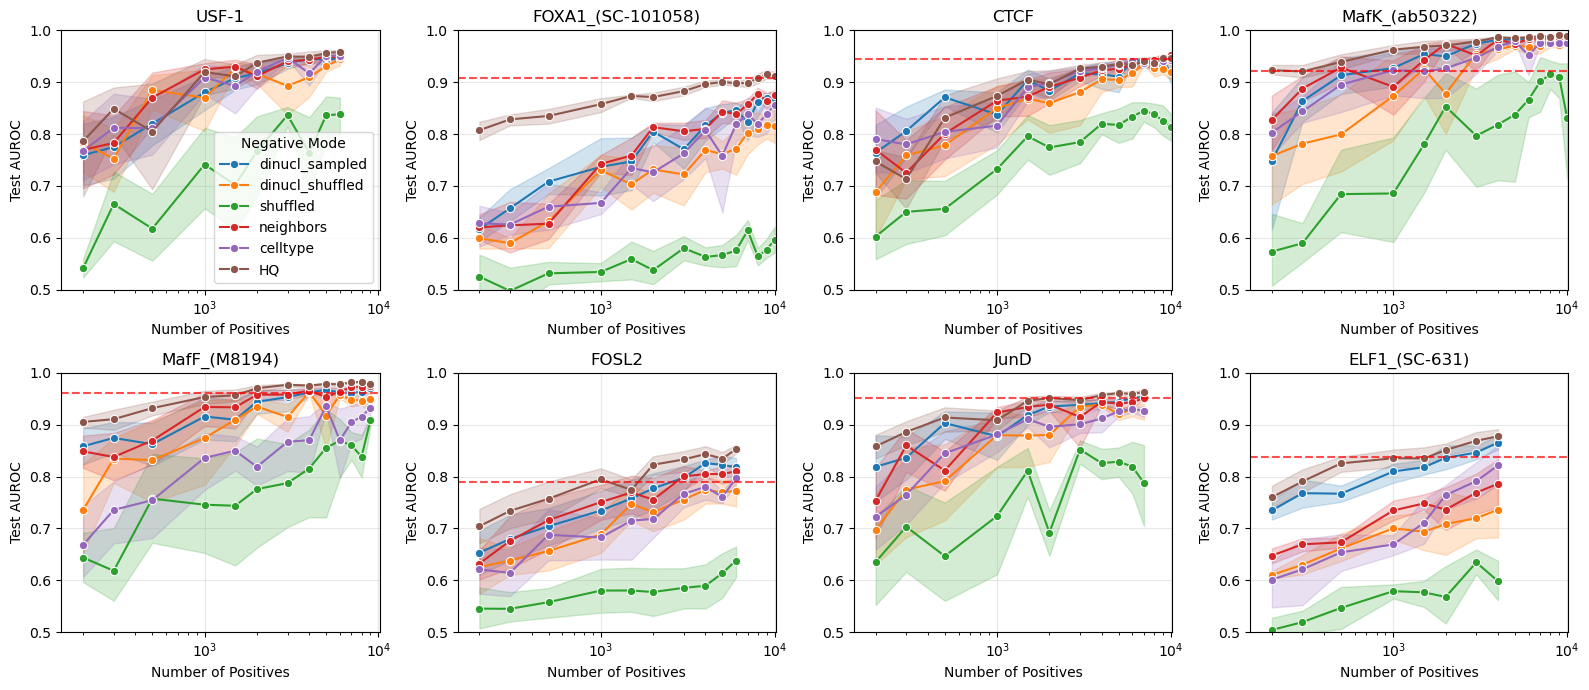

In [29]:
# Get unique TFs
unique_tfs = results_df['TF'].unique()
print(f"Unique TFs: {unique_tfs}")

# Filter out SP1 and Mxi1_(AF4185) from the TFs to plot
unique_tfs = [tf for tf in unique_tfs if tf not in ['SP1', 'Mxi1_(AF4185)']]
print(f"TFs to plot (after filtering): {unique_tfs}")

# Create subplots
n_tfs = len(unique_tfs)
n_cols = 4  # Number of columns in subplot grid
n_rows = (n_tfs + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 3.5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

# Create a plot for each TF
for i, tf in enumerate(unique_tfs):
    # Filter data for current TF
    tf_data = results_df[results_df['TF'] == tf].copy()
    
    # Merge with combination counts to get number of negatives
    tf_with_negatives = tf_data.merge(
        combination_counts_cv[combination_counts_cv['TF'] == tf][['neg_mode', 'cross_val_set', 'count']],
        on=['neg_mode', 'cross_val_set'],
        how='left'
    )
    
    # Create the lineplot
    sns.lineplot(data=tf_with_negatives, x='pos_limit', y='AUROC_HQ', hue='neg_mode', 
                marker='o', ax=axes[i])
    # Add motif performance as horizontal line if available
    tf_motif_data = motif_performance[motif_performance['TF'] == tf]
    if not tf_motif_data.empty:
        motif_auroc = tf_motif_data['AUROC'].iloc[0]
        axes[i].axhline(y=motif_auroc, color='red', linestyle='--', alpha=0.7, label='Motif baseline')
    axes[i].set_xlabel('Number of Positives')
    axes[i].set_ylim(0.5, 1.0)  # Set y-axis limits for better visibility
    axes[i].set_xlim(150, 10150)
    axes[i].set_ylabel('Test AUROC')
    axes[i].set_title(f'{tf}')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xscale('log')  # Set x-axis to logarithmic scale for better visibility of differences
    
    # Adjust legend
    if i == 0:
        axes[i].legend(title='Negative Mode', loc='lower right')
    else:
        axes[i].legend().set_visible(False)

# Hide any unused subplots
for i in range(n_tfs, len(axes)):
    axes[i].set_visible(False)

# Adjust layout
plt.tight_layout()
#plt.savefig('num_pos.pdf', bbox_inches='tight', dpi=300)
plt.show()